## **Importing Libraries**

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


## loading **database**

In [44]:
#Loding data
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

## **Get the shape of the arryas**

In [46]:
print('X_train shape:', x_train.shape)
print('Y_train shape:', y_train.shape)
print('X_test shape:', x_test.shape)
print('Y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


## **Take a look at the first image**

In [ ]:
#Take a look at the first image 
index = 10
x_train[index]

The image label is: [4]


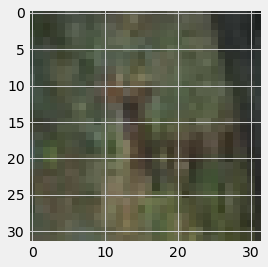

In [48]:
#Show the image
img = plt.imshow(x_train[index])
print('The image label is:',y_train[index])

In [49]:
#Get the image classification
classification = ['airplane','autombile','bird','cat','deer','dog','frog','house','ship','truck']

print('The image class is: ',classification[y_train[index][0]])

The image class is:  deer


In [50]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [51]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [52]:
#Print the new labels of the image/picture above
print(y_test_one_hot[index])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## **Normalize the pixels to be values between 0 and 1**

In [53]:
# (A pixel contains 8 bits (1 byte))
#8-bit integer giving a range of possible values from 0 to 255.
x_train = x_train / 255
x_test = x_test / 255


In [ ]:
x_train[index]

In [55]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another convolution layer
model.add(Conv2D(32,(5,5),activation='relu'))

#Add a another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flatteing layer
model.add(Flatten())

#add a layer with 1000 neurons
model.add(Dense(1000,activation='relu'))

#add a drop out layer
model.add(Dropout(0.5))

#add a layer with 500 neurons
model.add(Dense(500,activation='relu'))

#add a drop out layer
model.add(Dropout(0.5))

#add a layer with 250 neurons
model.add(Dense(250,activation='relu'))

#add a layer with 10 neurons
model.add(Dense(10,activation='softmax'))



In [64]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [66]:
#Train the model
hist = model.fit(x_train,y_train_one_hot, 
                 batch_size=256, 
                 epochs=10, 
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 80s 512ms/step - loss: 1.8066 - accuracy: 0.3268 - val_loss: 1.5465 - val_accuracy: 0.4275
Epoch 2/10
157/157 [==============================] - 76s 485ms/step - loss: 1.4420 - accuracy: 0.4697 - val_loss: 1.3879 - val_accuracy: 0.5094
Epoch 3/10
157/157 [==============================] - 77s 491ms/step - loss: 1.3111 - accuracy: 0.5266 - val_loss: 1.3880 - val_accuracy: 0.5159
Epoch 4/10
157/157 [==============================] - 78s 494ms/step - loss: 1.2082 - accuracy: 0.5653 - val_loss: 1.1315 - val_accuracy: 0.5963
Epoch 5/10
157/157 [==============================] - 77s 491ms/step - loss: 1.1192 - accuracy: 0.5980 - val_loss: 1.0716 - val_accuracy: 0.6200
Epoch 6/10
157/157 [==============================] - 78s 495ms/step - loss: 1.0515 - accuracy: 0.6280 - val_loss: 1.0458 - val_accuracy: 0.6348
Epoch 7/10
157/157 [==============================] - 77s 491ms/step - loss: 1.0027 - accuracy: 0.6459 - val_loss: 0.9890 - val_ac

In [68]:
#Evaluate the model using the test data set
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 9s 28ms/step - loss: 1.0129 - accuracy: 0.6539


0.6539000272750854

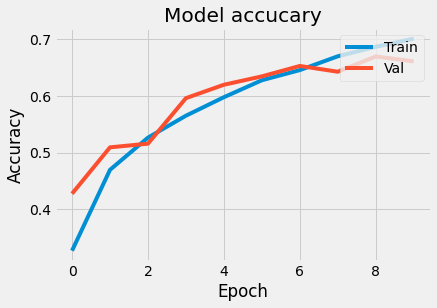

In [69]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy']) #validation accuracy
plt.title('Model accucary')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

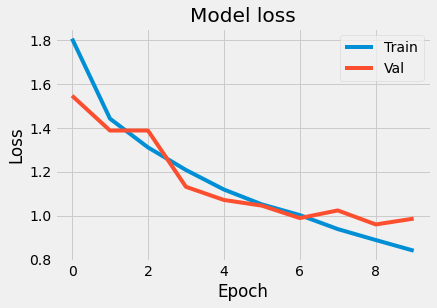

In [70]:
#Vizualise the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) #validation loss
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

## Test the model with an example

In [95]:
from google.colab import files
uploaded = files.upload()

Saving 2.jpg to 2.jpg


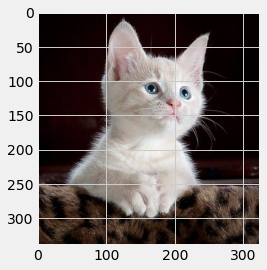

In [96]:
#show the image
new_img = plt.imread('2.jpg')
img = plt.imshow(new_img)

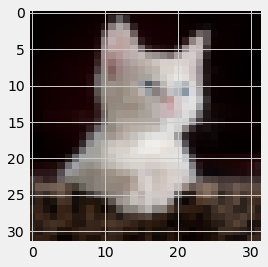

In [97]:
#resize image
from skimage.transform import resize
resized_image = resize(new_img,(32,32,3))
img = plt.imshow(resized_image)

In [98]:
#Get the models predictions 
predictions = model.predict(np.array([resized_image]))

#Show the predictions
predictions

array([[1.1515141e-03, 1.1108655e-04, 3.8972054e-02, 8.6843133e-01,
        1.4044692e-02, 6.3907459e-02, 1.0537795e-02, 1.5735782e-03,
        1.1665832e-03, 1.0386339e-04]], dtype=float32)

In [99]:
from types import prepare_class
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#show the sorted labels order
print(list_index)

[3, 5, 2, 4, 6, 7, 8, 0, 1, 9]


In [104]:
for i in range(5):
  print(classification[list_index[i]],':',round(predictions[0][list_index[i]] * 100,2),'%')

cat : 86.84 %
dog : 6.39 %
bird : 3.9 %
deer : 1.4 %
frog : 1.05 %
